### Загрузим данные, подгрузим нужные библиотеки.

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from dateutil.relativedelta import relativedelta


#### customers - данные о пользователях.

    customer_id —  позаказный идентификатор пользователя
    customer_unique_id —  уникальный идентификатор пользователя (аналог номера паспорта)
    customer_zip_code_prefix —  почтовый индекс пользователя
    customer_city —  город доставки пользователя
    customer_state —  штат доставки пользователя

In [5]:
customers = pd.read_csv('csv/olist_customers_dataset.csv')
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


#### orders - данные о заказах

    order_id —  уникальный идентификатор заказа (номер чека)
    customer_id —  позаказный идентификатор пользователя
    order_status —  статус заказа
    order_purchase_timestamp —  время создания заказа
    order_approved_at —  время подтверждения оплаты заказа
    order_delivered_carrier_date —  время передачи заказа в логистическую службу
    order_delivered_customer_date —  время доставки заказа
    order_estimated_delivery_date —  обещанная дата доставки

In [6]:
orders = pd.read_csv('csv/olist_orders_dataset.csv')
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


#### order_items - данные о товарах, входящих в заказы

    order_id —  уникальный идентификатор заказа (номер чека)
    order_item_id —  идентификатор товара внутри одного заказа
    product_id —  ид товара (аналог штрихкода)
    seller_id — ид производителя товара
    shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
    price —  цена за единицу товара
    freight_value —  вес товара

In [7]:
order_items = pd.read_csv('csv/olist_order_items_dataset.csv')
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


### Переведем нужные колонки содержащие дату в тип datetime.

In [8]:
orders.order_approved_at = pd.to_datetime(orders.order_approved_at)
orders.order_purchase_timestamp = pd.to_datetime(orders.order_purchase_timestamp)
orders.order_estimated_delivery_date = pd.to_datetime(orders.order_estimated_delivery_date)
orders.dtypes

order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date             object
order_delivered_customer_date            object
order_estimated_delivery_date    datetime64[ns]
dtype: object

## 1. Сколько у нас пользователей, которые совершили покупку только один раз?

### Cоздадим таблицу которую будем анализировать.

In [9]:
table_1 = pd.merge(customers[['customer_id', 'customer_unique_id']], 
                  orders[['order_id', 'customer_id', 'order_status', 'order_approved_at', 'order_purchase_timestamp']], 
                  on = 'customer_id'
                 )
table_1.head()

,customer_id,customer_unique_id,order_id,order_status,order_approved_at,order_purchase_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,2018-07-29 09:51:30


### Будем считать за покупку заказ где есть дата формирования заказа и дата подтверждения оплаты. 
#### Посмотрим сколько дат в виде NaN и уберем их.

In [10]:
print('Количество na в колонке с подтверждением заказа: ', table_1.order_approved_at.isna().sum(), '\n',
      'Количество na в колонке создания заказа: ', table_1.order_purchase_timestamp.isna().sum())

Количество na в колонке с подтверждением заказа:  160 
 Количество na в колонке создания заказа:  0


#### Удаляем все значения NaN.

In [11]:
table_1.order_approved_at = table_1.order_approved_at.isna()
table_1 = table_1[table_1.order_approved_at == False]

#### Выделим количество пользователей с одним заказом.

In [12]:
table_1 = table_1.groupby('customer_unique_id').order_id.nunique()

In [13]:
count_1 = table_1[table_1 == 1].shape[0]

print('\n', 'Количество пользователей с одним заказом: ', count_1, '\n')


 Количество пользователей с одним заказом:  93049 



## 2. Сколько заказов в месяц в среднем не доставляется по разным причинам (вывести детализацию по причинам)? 

#### Снова создадим таблицу для анализа.


In [14]:
table_2 = orders[['order_status', 'order_estimated_delivery_date']]
table_2.head()

,order_status,order_estimated_delivery_date
0,delivered,2017-10-18
1,delivered,2018-08-13
2,delivered,2018-09-04
3,delivered,2017-12-15
4,delivered,2018-02-26


#### Используем resample чтобы разбить данные по месяцам, а затем создадим сводную таблицу.  Оставим только заказы со статусом canceled и unavailible.

In [15]:
table_2 = table_2.sort_values(by = 'order_estimated_delivery_date')
table_2 = table_2.rename(columns = {'order_estimated_delivery_date': 'months'})
table_2.set_index('months', inplace = True)

cancel = ['unavailable', 'canceled']
table_2 = table_2.query('order_status == @cancel') \
                    .groupby('order_status') \
                    .resample(rule='MS').count() \
                    .rename(columns = {'order_status': 'count_order'}) \
                    .reset_index() \
                    .pivot(index = 'months', columns = 'order_status', values = 'count_order') \
                    .fillna(0)

In [16]:
table_2.head()

order_status,canceled,unavailable
months,,
2016-09-01,1.0,0.0
2016-10-01,3.0,0.0
2016-11-01,14.0,5.0
2016-12-01,8.0,2.0
2017-01-01,0.0,0.0


#### Посмотрим сколько в среднем не доставляется в месяц заказов и построим гистограмму.

In [17]:
print('В среднем в месяц не доставляют ', round(table_2.mean()[0], 1), ' заказа по причине ', table_2.columns[0], '\n',
      'В среднем в месяц не доставляют ', round(table_2.mean()[1], 1), ' заказа по причине ', table_2.columns[1], '\n',
      sep = '')

В среднем в месяц не доставляют 23.1 заказа по причине canceled
В среднем в месяц не доставляют 22.6 заказа по причине unavailable



Text(0.5, 1.0, 'Детализация причин по которым не доставляются заказы')

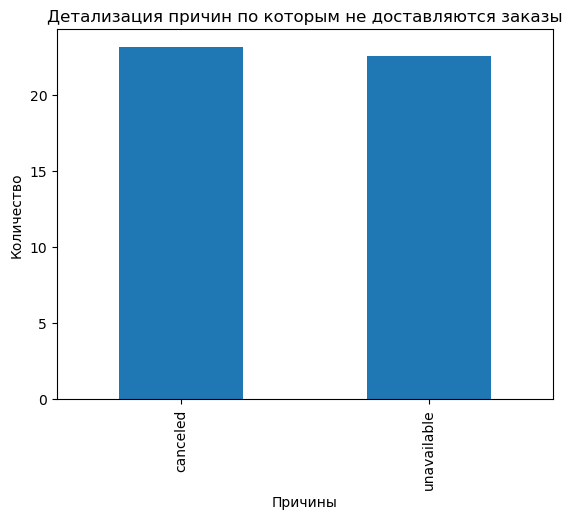

In [18]:
table_2.mean().plot.bar()

plt.xlabel('Причины')
plt.ylabel('Количество')
plt.title('Детализация причин по которым не доставляются заказы')

#### Построим распределение причин по которым не доставляется товар по месяцам.
Чтобы график ниже отобразился перезапустите ячейку

In [19]:
fig = px.histogram(table_2.reset_index(), x='months', y = ['canceled', 'unavailable'], 
                   nbins = table_2.shape[0], labels={
                   "order_estimated_delivery_date": "Распределение по месяцам"},
                   title="Распределение причин неудачной доставки по месяцам")
fig.show()

## 3. По каждому товару определить, в какой день недели товар чаще всего покупается.
####  Табличка для анализа 

In [20]:
table_3 = pd.merge(order_items[['order_id', 'order_item_id', 'product_id']], 
                  orders[['order_id', 'order_purchase_timestamp']], 
                  on = 'order_id', how = 'inner'
                 )
table_3.head()


,order_id,order_item_id,product_id,order_purchase_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,2017-09-13 08:59:02
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,2017-04-26 10:53:06
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,2018-01-14 14:33:31
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,2018-08-08 10:00:35
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,2017-02-04 13:57:51


 #### Создадим колонку с названием дня недели покупки, затем сгруппируемся по товару и с помощью value_counts найдем наиболее частый день.

In [21]:
table_3['weekday'] = table_3.order_purchase_timestamp.dt.day_name()
table_3 = table_3.groupby('product_id', as_index = False).weekday.apply(lambda x: x.value_counts().index[0])

In [22]:
table_3.head()

,product_id,weekday
0,00066f42aeeb9f3007548bb9d3f33c38,Sunday
1,00088930e925c41fd95ebfe695fd2655,Tuesday
2,0009406fd7479715e4bef61dd91f2462,Thursday
3,000b8f95fcb9e0096488278317764d19,Friday
4,000d9be29b5207b54e86aa1b1ac54872,Tuesday


## 4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)?

In [23]:
table_4 = pd.merge(customers[['customer_id', 'customer_unique_id']],
                  orders[['customer_id', 'order_id', 'order_purchase_timestamp', 'order_status']],
                  on = 'customer_id', how = 'inner'
                 )

cancel = ['unavailable', 'canceled']
table_4 = table_4.query('order_status != @cancel')

In [24]:
table_4.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,delivered
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,delivered
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,delivered


In [25]:
table_4 = table_4 \
    .groupby(['customer_unique_id', 'order_purchase_timestamp'], as_index = False) \
    .agg({'order_id':'count'})

In [26]:
table_4.head()

,customer_unique_id,order_purchase_timestamp,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,1


In [27]:
table_4['count_of_week'] = table_4.order_purchase_timestamp.dt.daysinmonth/7
table_4['order_per_week'] = np.round(table_4.order_id/table_4.count_of_week, 3)
table_4.drop(['count_of_week', 'order_id'], axis = 1, inplace = True)
table_4.order_purchase_timestamp = table_4.order_purchase_timestamp.dt.strftime('%Y-%m')
table_4.rename(columns = {
                'order_purchase_timestamp':'month_of_order', 
                'customer_unique_id':'client_id'}, 
                inplace = True)

In [28]:
table_4.head()

,client_id,month_of_order,order_per_week
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05,0.226
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05,0.226
2,0000f46a3911fa3c0805444483337064,2017-03,0.226
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10,0.226
4,0004aac84e0df4da2b147fca70cf8255,2017-11,0.233


## 5. Используя pandas, провожу когортный анализ пользователей. В период с января по декабрь выявляю когорту с самым высоким retention на 3й месяц.
Описание подхода тут (https://vc.ru/s/productstar/134090-chto-takoe-kogortnyy-analiz)
#### Снова новая таблица

In [29]:
table_5 = pd.merge(customers[['customer_id', 'customer_unique_id']],
          orders[['customer_id', 'order_id', 'order_purchase_timestamp', 'order_status']],
          on = 'customer_id', how = 'inner'
)
cancel = ['unavailable', 'canceled']
table_5.query('order_status != @cancel', inplace = True)

In [30]:
table_5.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_status
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,delivered
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,delivered
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,delivered
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,delivered
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,delivered


In [31]:
table_5['period'] = table_5.order_purchase_timestamp.dt.strftime('%Y/%m')

In [32]:
cohort = table_5

In [33]:
cohort.head()

,customer_id,customer_unique_id,order_id,order_purchase_timestamp,order_status,period
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:05:35,delivered,2017/05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:48:24,delivered,2018/01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-19 16:07:45,delivered,2018/05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,951670f92359f4fe4a63112aa7306eba,2018-03-13 16:06:38,delivered,2018/03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 09:51:30,delivered,2018/07


In [34]:
first_order = cohort\
    .groupby(['customer_unique_id'], as_index=False)\
    .agg({'order_purchase_timestamp': 'min'})\
    .rename(columns={'order_purchase_timestamp': 'first_order'})

In [35]:
first_order.head()

,customer_unique_id,first_order
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42


In [36]:
first_order['period_first_order'] = first_order.first_order.dt.strftime('%Y/%m')

In [37]:
cohort = cohort.merge(first_order, on='customer_unique_id')

In [38]:
cohort['period'] = pd.to_datetime(cohort.period).dt.to_period('M')

In [39]:
cohort['period_first_order'] = pd.to_datetime(cohort.period_first_order).dt.to_period('M')

In [40]:
cohort['month'] = cohort['period'].sub(cohort['period_first_order'])\
                                                    .apply(lambda x: x.n)

In [41]:
cohort1 = cohort.pivot_table(index='period_first_order', columns='month', 
                                     values='customer_unique_id', aggfunc='nunique')

In [42]:
cohort1

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
period_first_order,,,,,,,,,,,,,,,,,,,,
2016-09,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,290.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,2.0
2016-12,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,752.0,3.0,2.0,1.0,3.0,1.0,3.0,1.0,1.0,NaN,3.0,1.0,5.0,3.0,1.0,1.0,2.0,3.0,1.0,NaN
2017-02,1690.0,4.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,4.0,NaN,NaN
2017-03,2571.0,13.0,9.0,10.0,9.0,4.0,4.0,8.0,9.0,2.0,10.0,3.0,6.0,3.0,4.0,6.0,2.0,4.0,NaN,NaN
2017-04,2325.0,14.0,5.0,4.0,7.0,6.0,8.0,7.0,7.0,4.0,6.0,2.0,2.0,1.0,2.0,2.0,3.0,NaN,NaN,NaN
2017-05,3541.0,17.0,17.0,14.0,11.0,12.0,15.0,5.0,9.0,9.0,9.0,12.0,9.0,1.0,7.0,8.0,NaN,NaN,NaN,NaN
2017-06,3102.0,14.0,11.0,12.0,8.0,12.0,11.0,7.0,4.0,7.0,10.0,10.0,5.0,4.0,6.0,NaN,NaN,NaN,NaN,NaN


In [43]:
cohort_size = cohort1.iloc[:, 0]
retention_matrix = cohort1.divide(cohort_size, axis=0)

In [44]:
retention_matrix = retention_matrix.query('period_first_order >= "2017-01" and period_first_order<"2018-01"')

In [45]:
retention_matrix

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
period_first_order,,,,,,,,,,,,,,,,,,,,
2017-01,1.0,0.003989,0.002660,0.001330,0.003989,0.001330,0.003989,0.001330,0.001330,NaN,0.003989,0.001330,0.006649,0.003989,0.001330,0.001330,0.002660,0.003989,0.00133,NaN
2017-02,1.0,0.002367,0.002959,0.001183,0.004142,0.001183,0.002367,0.001775,0.001183,0.001775,0.001183,0.002959,0.001183,0.001775,0.001183,0.000592,0.000592,0.002367,NaN,NaN
2017-03,1.0,0.005056,0.003501,0.003890,0.003501,0.001556,0.001556,0.003112,0.003501,0.000778,0.003890,0.001167,0.002334,0.001167,0.001556,0.002334,0.000778,0.001556,NaN,NaN
2017-04,1.0,0.006022,0.002151,0.001720,0.003011,0.002581,0.003441,0.003011,0.003011,0.001720,0.002581,0.000860,0.000860,0.000430,0.000860,0.000860,0.001290,NaN,NaN,NaN
2017-05,1.0,0.004801,0.004801,0.003954,0.003106,0.003389,0.004236,0.001412,0.002542,0.002542,0.002542,0.003389,0.002542,0.000282,0.001977,0.002259,NaN,NaN,NaN,NaN
2017-06,1.0,0.004513,0.003546,0.003868,0.002579,0.003868,0.003546,0.002257,0.001289,0.002257,0.003224,0.003224,0.001612,0.001289,0.001934,NaN,NaN,NaN,NaN,NaN
2017-07,1.0,0.005233,0.003401,0.002355,0.002878,0.002093,0.003140,0.001047,0.001832,0.002616,0.002093,0.002878,0.001308,0.002616,NaN,NaN,NaN,NaN,NaN,NaN
2017-08,1.0,0.006780,0.003390,0.002663,0.003632,0.005327,0.002906,0.002663,0.001453,0.001453,0.002421,0.001937,0.001211,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09,1.0,0.006871,0.005399,0.002945,0.004417,0.002209,0.002209,0.002454,0.002945,0.001718,0.002699,0.000736,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
final = (retention_matrix
            .style
            .set_caption('User retention by cohort')  # добавляем подпись
            .format("{:.2%}", na_rep=""))  # числа форматируем как проценты, NaN заменяем на пустоту
final

month,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20
period_first_order,,,,,,,,,,,,,,,,,,,,
2017-01,100.00%,0.40%,0.27%,0.13%,0.40%,0.13%,0.40%,0.13%,0.13%,,0.40%,0.13%,0.66%,0.40%,0.13%,0.13%,0.27%,0.40%,0.13%,
2017-02,100.00%,0.24%,0.30%,0.12%,0.41%,0.12%,0.24%,0.18%,0.12%,0.18%,0.12%,0.30%,0.12%,0.18%,0.12%,0.06%,0.06%,0.24%,,
2017-03,100.00%,0.51%,0.35%,0.39%,0.35%,0.16%,0.16%,0.31%,0.35%,0.08%,0.39%,0.12%,0.23%,0.12%,0.16%,0.23%,0.08%,0.16%,,
2017-04,100.00%,0.60%,0.22%,0.17%,0.30%,0.26%,0.34%,0.30%,0.30%,0.17%,0.26%,0.09%,0.09%,0.04%,0.09%,0.09%,0.13%,,,
2017-05,100.00%,0.48%,0.48%,0.40%,0.31%,0.34%,0.42%,0.14%,0.25%,0.25%,0.25%,0.34%,0.25%,0.03%,0.20%,0.23%,,,,
2017-06,100.00%,0.45%,0.35%,0.39%,0.26%,0.39%,0.35%,0.23%,0.13%,0.23%,0.32%,0.32%,0.16%,0.13%,0.19%,,,,,
2017-07,100.00%,0.52%,0.34%,0.24%,0.29%,0.21%,0.31%,0.10%,0.18%,0.26%,0.21%,0.29%,0.13%,0.26%,,,,,,
2017-08,100.00%,0.68%,0.34%,0.27%,0.36%,0.53%,0.29%,0.27%,0.15%,0.15%,0.24%,0.19%,0.12%,,,,,,,
2017-09,100.00%,0.69%,0.54%,0.29%,0.44%,0.22%,0.22%,0.25%,0.29%,0.17%,0.27%,0.07%,,,,,,,,


In [47]:
retention_matrix[[3]].idxmax()

month
3    2017-05
dtype: period[M]

## 6. Используя python, построил RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. 
#### В кластеризации следующие метрики: R - время от последней покупки пользователя до текущей даты, F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. Для каждого RFM-сегмента построил границы метрик recency, frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю. 
Описание подхода нашел тут (https://guillaume-martin.github.io/rfm-segmentation-with-python.html).

In [48]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [49]:
task_6_1 = pd.merge(customers[['customer_id', 'customer_unique_id']],
                  orders[['customer_id', 'order_purchase_timestamp', 'order_id']],        
                  on = 'customer_id', how = 'inner'
)

task_table_6 = order_items[['order_id', 'price']]
task_table_6 = task_table_6.groupby('order_id', as_index = False).price.sum()

task_6 = pd.merge(task_6_1,
                  task_table_6,
                  on = 'order_id', how = 'inner'
)
task_6 = task_6.drop(['customer_id'], axis = 1)
task_6 = task_6.rename(columns = {'customer_unique_id':'user_id', 'order_purchase_timestamp':'timestamp'})

In [50]:
np.where(pd.isna(task_6))

(array([], dtype=int64), array([], dtype=int64))

In [51]:
task_6_final = task_6 \
    .groupby('user_id', as_index = False) \
    .agg({
    'price':'sum',
    'timestamp':'max',
    'order_id':'nunique'
})
task_6_final.rename(columns = {
                    'price': 'sum_price', 
                    'timestamp':'first_purchase_date', 
                    'order_id':'count_purchase'}, 
                    inplace = True)

In [52]:
task_6_final.head()

,user_id,sum_price,first_purchase_date,count_purchase
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90,2018-05-10 10:56:27,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90,2018-05-07 11:11:27,1
2,0000f46a3911fa3c0805444483337064,69.00,2017-03-10 21:05:03,1
3,0000f6ccb0745a6a4b88665a16c9f078,25.99,2017-10-12 20:29:41,1
4,0004aac84e0df4da2b147fca70cf8255,180.00,2017-11-14 19:45:42,1


In [53]:
current_date = task_6_final.first_purchase_date.max() + relativedelta(months=1)
task_6_final['last_purchase_days'] = (task_6_final.first_purchase_date.apply(lambda x: current_date - x)).dt.days

Text(0.5, 1.0, 'Распределение давности заказов')

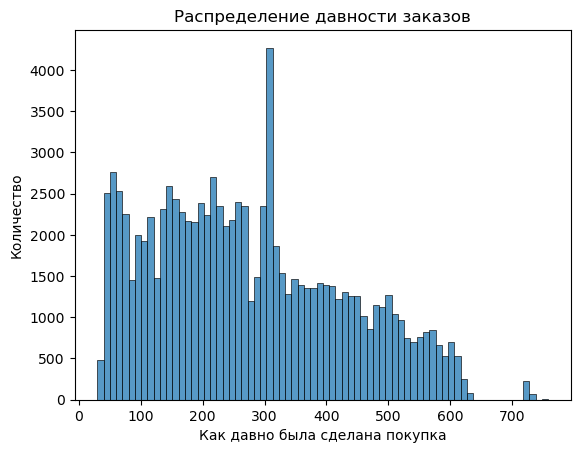

In [54]:
sns.histplot(task_6_final.last_purchase_days)

plt.xlabel('Как давно была сделана покупка')
plt.ylabel('Количество')
plt.title('Распределение давности заказов')

In [55]:
 def recency(arg):
    if arg <= 30:
        return 3
    elif (arg > 30) & (arg <= 90):
        return 2
    else:
        return 1
    
task_6_final['recency'] = task_6_final.last_purchase_days.apply(recency)

Text(0.5, 1.0, 'Распределение количества заказов пользователей')

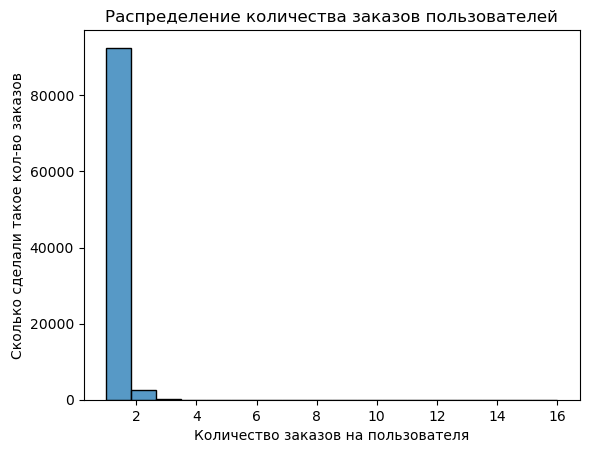

In [56]:
sns.histplot(task_6_final.count_purchase)

plt.xlabel('Количество заказов на пользователя')
plt.ylabel('Сколько сделали такое кол-во заказов')
plt.title('Распределение количества заказов пользователей')

In [57]:
 def frequency(arg):
    if arg == 1:
        return 1
    elif arg in [2, 3]:
        return 2
    else:
        return 3

task_6_final['frequency'] = task_6_final.count_purchase.apply(frequency)

Text(0.5, 1.0, 'Распределение сумм заказов')

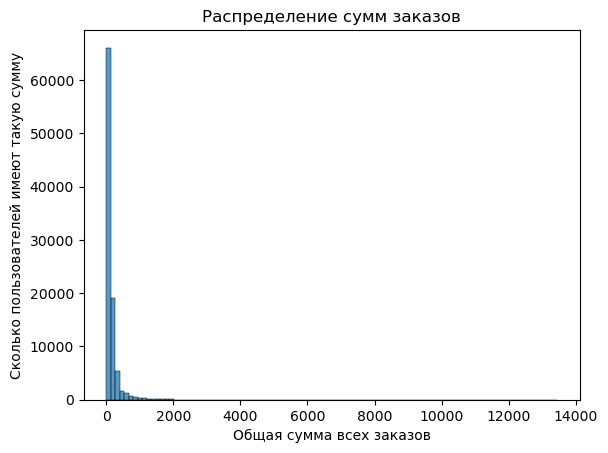

In [58]:
sns.histplot(task_6_final.sum_price, bins = 100)

plt.xlabel('Общая сумма всех заказов')
plt.ylabel('Сколько пользователей имеют такую сумму')
plt.title('Распределение сумм заказов')

In [59]:
def monetary(arg):
    if arg <= 200:
        return 1
    elif (arg > 200) & (arg < 1000):
        return 2
    else:
        return 3

task_6_final['monetary'] = task_6_final.sum_price.apply(monetary)

In [60]:
task_6_final['rfm_group'] = task_6_final \
                            .apply(lambda x: str(x.recency) + str(x.frequency) + str(x.monetary), axis = 1)

task_6_result = task_6_final \
        .groupby('rfm_group') \
        .agg({
        'last_purchase_days':'mean',
        'count_purchase': 'mean',
        'sum_price': 'mean'
        }) \
        .reset_index() \
        .rename(columns = {
        'last_purchase_days': 'R_mean',
        'count_purchase': 'F_mean',
        'sum_price': 'M_mean',
        'rfm_group': 'RFM_group'
        })

task_6_result = task_6_result.style.hide_index().format("{:.2f}", subset=task_6_result.columns.drop('RFM_group'))

C:\Users\merabi\AppData\Local\Temp\ipykernel_11416\3201782879.py:19: FutureWarning:

this method is deprecated in favour of `Styler.hide(axis="index")`



In [61]:
task_6_result

RFM_group,R_mean,F_mean,M_mean
111,302.70,1.00,81.49
112,306.88,1.00,375.19
113,309.40,1.00,1606.04
121,291.92,2.04,118.71
122,281.38,2.09,371.32
123,263.56,2.12,1608.29
131,604.00,4.67,54.87
132,198.16,4.71,532.53
133,200.25,5.50,1308.31
211,62.09,1.00,81.55
